## Problem Statement<br>
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src="XNote_201901081613670.jpg">

Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Step 1: Reading the Data<br>

Let us first import necessary libraries and read the country dataset

In [309]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [310]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [311]:
# Read the CSV file.

leads = pd.read_csv('Leads.csv')

# Step 2: Inspecting the Data

In [312]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [313]:
leads.shape

(9240, 37)

In [314]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [315]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 3: Exploratory Data Analysis(EDA):

- We need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called <b>'Select'</b> which needs to be handled because it is as good as a null value.
- This is becasue the customer did not select any value from a drop down or a list box.

In [316]:
leads.columns[leads.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [317]:
leads = leads.replace('Select', np.nan)

In [318]:
# Check the null values percentage

round((leads.isnull().sum()/len(leads)) * 100).astype(int)

Prospect ID                                       0
Lead Number                                       0
Lead Origin                                       0
Lead Source                                       0
Do Not Email                                      0
Do Not Call                                       0
Converted                                         0
TotalVisits                                       1
Total Time Spent on Website                       0
Page Views Per Visit                              1
Last Activity                                     1
Country                                          27
Specialization                                   37
How did you hear about X Education               78
What is your current occupation                  29
What matters most to you in choosing a course    29
Search                                            0
Magazine                                          0
Newspaper Article                                 0
X Education 

In [319]:
# Drop columns which have 30% or more missing values

drop_cols = leads.columns[leads.isnull().mean() >= .3]

leads = leads.drop(drop_cols, axis=1)

In [320]:
# Check the null values percentage

np.ceil((leads.isnull().sum()/len(leads)) * 100).astype(int).sort_values()

Prospect ID                                       0
I agree to pay the amount through cheque          0
Get updates on DM Content                         0
Update me on Supply Chain Content                 0
Receive More Updates About Our Courses            0
Through Recommendations                           0
Digital Advertisement                             0
Newspaper                                         0
X Education Forums                                0
Newspaper Article                                 0
Magazine                                          0
Search                                            0
A free copy of Mastering The Interview            0
Last Notable Activity                             0
Total Time Spent on Website                       0
Converted                                         0
Do Not Call                                       0
Do Not Email                                      0
Lead Origin                                       0
Lead Number 

- Lets check each of the columns with empty values.

In [321]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
WeLearn                 1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [322]:
# From above Google is repeating. So we can change the google to Google
# Also as Google is high in volume we can make nulls(fery few of them) as Google

leads['Lead Source'] = leads['Lead Source'].replace([np.nan, 'google'], 'Google')

In [323]:
leads['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
blog                    1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [324]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [325]:
# Lets make a new value such as 'Unknown' for these null values.

leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Unknown')

In [326]:
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [327]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [328]:
# The mean and median for 'Page Views Per Visit' is 2. So lets make all the nulls as mean.

leads['Page Views Per Visit']=leads['Page Views Per Visit'].replace(np.nan, leads['Page Views Per Visit'].mean())

In [329]:
leads.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [330]:
leads.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [331]:
# The mean and median for 'TotalVisits' is same. So lets make all the nulls as mean.

leads.TotalVisits=leads.TotalVisits.replace(np.nan, leads['TotalVisits'].mean())

In [332]:
leads.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
Germany                    4
South Africa               4
Nigeria                    4
Sweden                     3
Bangladesh                 2
Belgium                    2
Asia/Pacific Region        2
China                      2
Uganda                     2
Italy                      2
Philippines                2
Ghana                      2
Netherlands                2
Denmark                    1
Kenya                      1
Indonesia                  1
Sri Lanka                  1
Tanzania                   1
Liberia       

In [333]:
# Around 30% have missing information or India as country. So lets drop the country column.

leads.drop(['Country'], axis=1, inplace=True)

In [334]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [335]:
# Again let us add a new category "Unknown" for missing values here.

leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan, 'Unknown')

In [336]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [337]:
# As this is having nearly 30% missing values, lets drop this column

leads.drop(['What matters most to you in choosing a course'], inplace=True, axis=1)

In [338]:
# Check the null values percentage

np.ceil((leads.isnull().sum()/len(leads)) * 100).astype(int)

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [339]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [340]:
# As both "Prospect ID" and "Lead Number" are primary key or unique we can drop these columns

leads.drop(['Prospect ID'], axis=1, inplace=True)
leads.drop(['Lead Number'], axis=1, inplace=True)

In [341]:
# Lets examine the unique values of categorical columns

column_list = leads.columns.values.tolist()
for column_name in column_list:
    if leads[column_name].dtypes == 'object':
        print(column_name, leads[column_name].unique())
        print()

Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'Facebook' 'blog' 'Pay per Click Ads'
 'bing' 'Social Media' 'WeLearn' 'Click2call' 'Live Chat'
 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release' 'NC_EDM']

Do Not Email ['No' 'Yes']

Do Not Call ['No' 'Yes']

Last Activity ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' 'Unknown'
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']

What is your current occupation ['Unemployed' 'Student' 'Unknown' 'Working Professional' 'Businessman'
 'Other' 'Housewife']

Search ['No' 'Yes']

Magazine ['No']

Newspa

In [342]:
# From above few columns have singe value 'No'. We can drop these columns as they doesnt make any sense

drop_cols = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
            'Get updates on DM Content', 'I agree to pay the amount through cheque']

leads = leads.drop(drop_cols, axis=1)

In [343]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Search                                  9240 non-null   obje

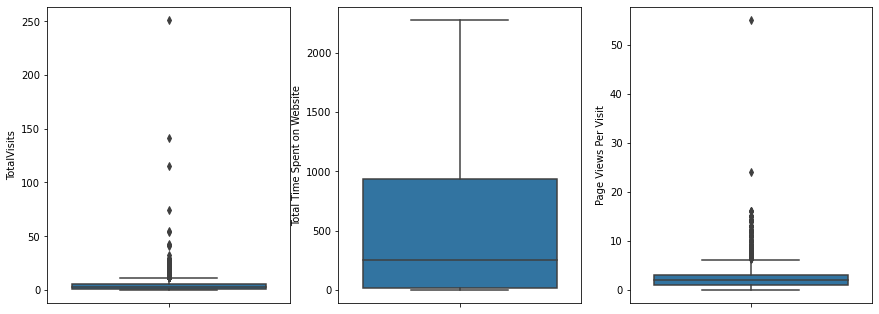

In [344]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'TotalVisits', data = leads, orient='v')
plt.subplot(2,4,2)
sns.boxplot(x = 'Total Time Spent on Website', data = leads, orient='v')
plt.subplot(2,4,3)
sns.boxplot(x = 'Page Views Per Visit', data = leads, orient='v')
plt.show()

In [345]:
# removing (statistical) outliers

# outlier treatment for TotalVisits
Q1 = leads.TotalVisits.quantile(0.05)
Q3 = leads.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads.TotalVisits >= Q1 - 1.5*IQR) & (leads.TotalVisits <= Q3 + 1.5*IQR)]

# outlier treatment for 'Total Time Spent on Website'
Q1 = leads['Total Time Spent on Website'].quantile(0.05)
Q3 = leads['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

# outlier treatment for 'Page Views Per Visit'
Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

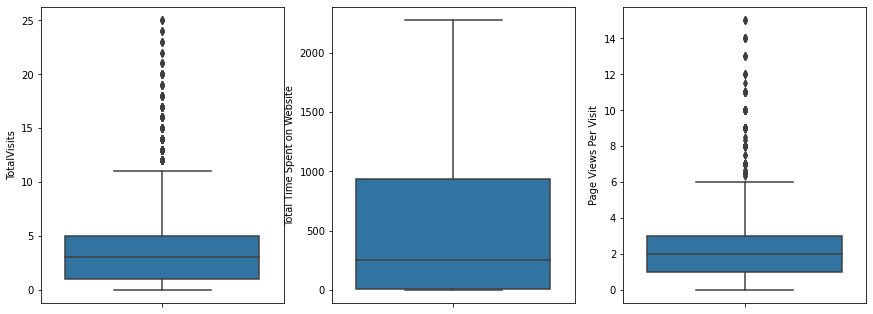

In [346]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'TotalVisits', data = leads, orient='v')
plt.subplot(2,4,2)
sns.boxplot(x = 'Total Time Spent on Website', data = leads, orient='v')
plt.subplot(2,4,3)
sns.boxplot(x = 'Page Views Per Visit', data = leads, orient='v')
plt.show()

- Now outliers are taken care of.

# Step 4: Data visualizaion

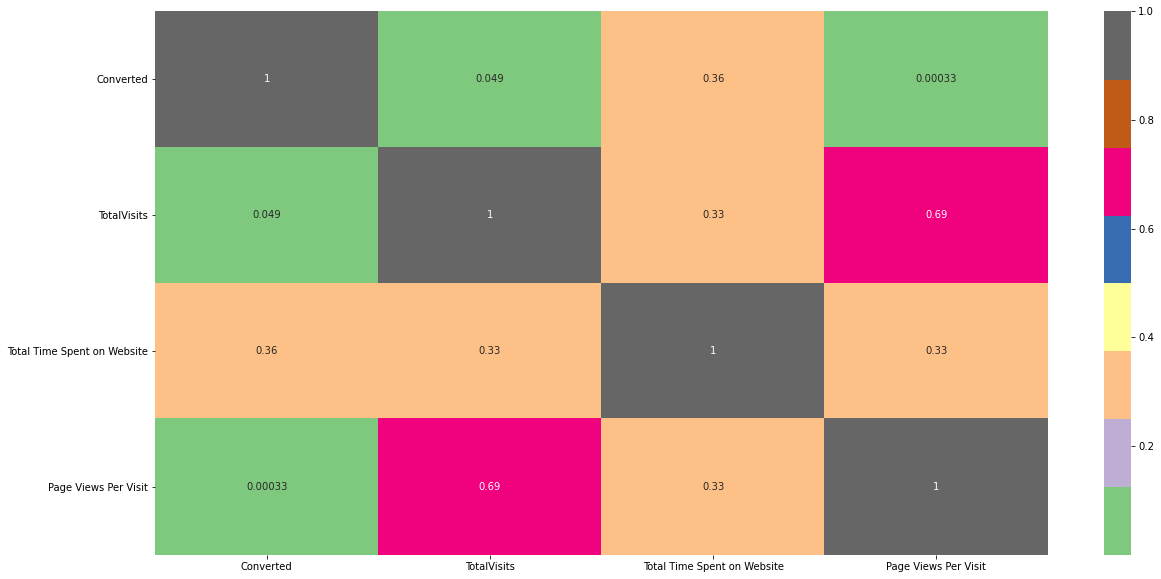

In [347]:
plt.figure(figsize = (20,10))        
sns.heatmap(leads.corr(),annot = True,cmap='Accent')
plt.show()

- There are no high correlations noted

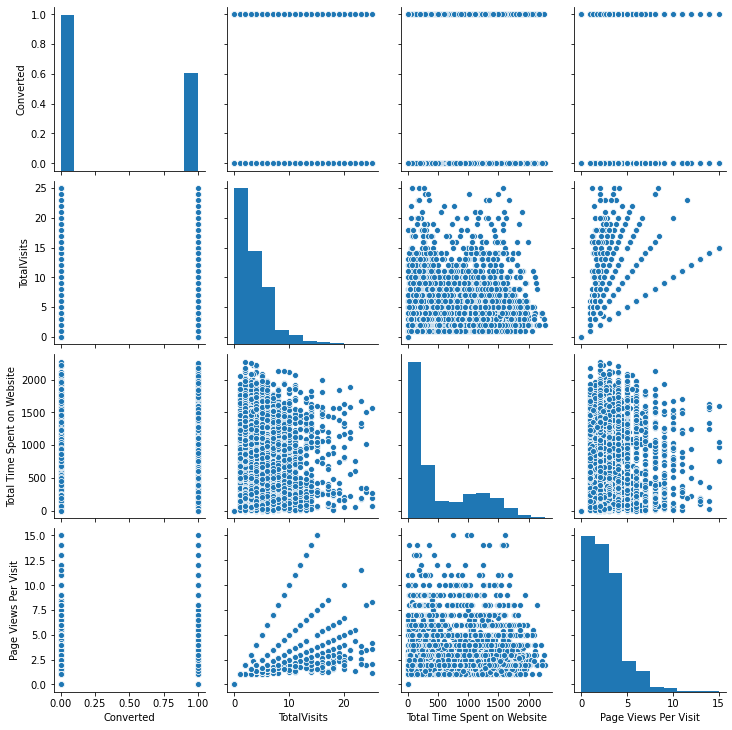

In [348]:
sns.pairplot(data = leads)
plt.show()

- TotalVisits and Page Views Per Visit are high in linearity

In [349]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9214 non-null   object 
 1   Lead Source                             9214 non-null   object 
 2   Do Not Email                            9214 non-null   object 
 3   Do Not Call                             9214 non-null   object 
 4   Converted                               9214 non-null   int64  
 5   TotalVisits                             9214 non-null   float64
 6   Total Time Spent on Website             9214 non-null   int64  
 7   Page Views Per Visit                    9214 non-null   float64
 8   Last Activity                           9214 non-null   object 
 9   What is your current occupation         9214 non-null   object 
 10  Search                                  9214 non-null   obje

In [350]:
def bar_sub_plot(attribute, x_label):
    temp_leads = leads[attribute].value_counts()

    fig,(ax1,ax2) = plt.subplots(1,2)
    figure = plt.gcf()
    figure.set_size_inches(10, 5)
    ax = sns.barplot(x= temp_leads.index, y= temp_leads.values, ax=ax1)
    ax.set_ylabel('Number of leads')
    ax.set_xlabel(x_label)
    
    ax = sns.barplot(x= leads[attribute], y= leads.Converted, ax=ax2)
    ax.set_xlabel(x_label)
    
    plt.show()

In [351]:
def plot_annote():
    for p in ax.patches:
    
        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()

        height = int(height)
        ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=14, color='black', ha='center', va='bottom')

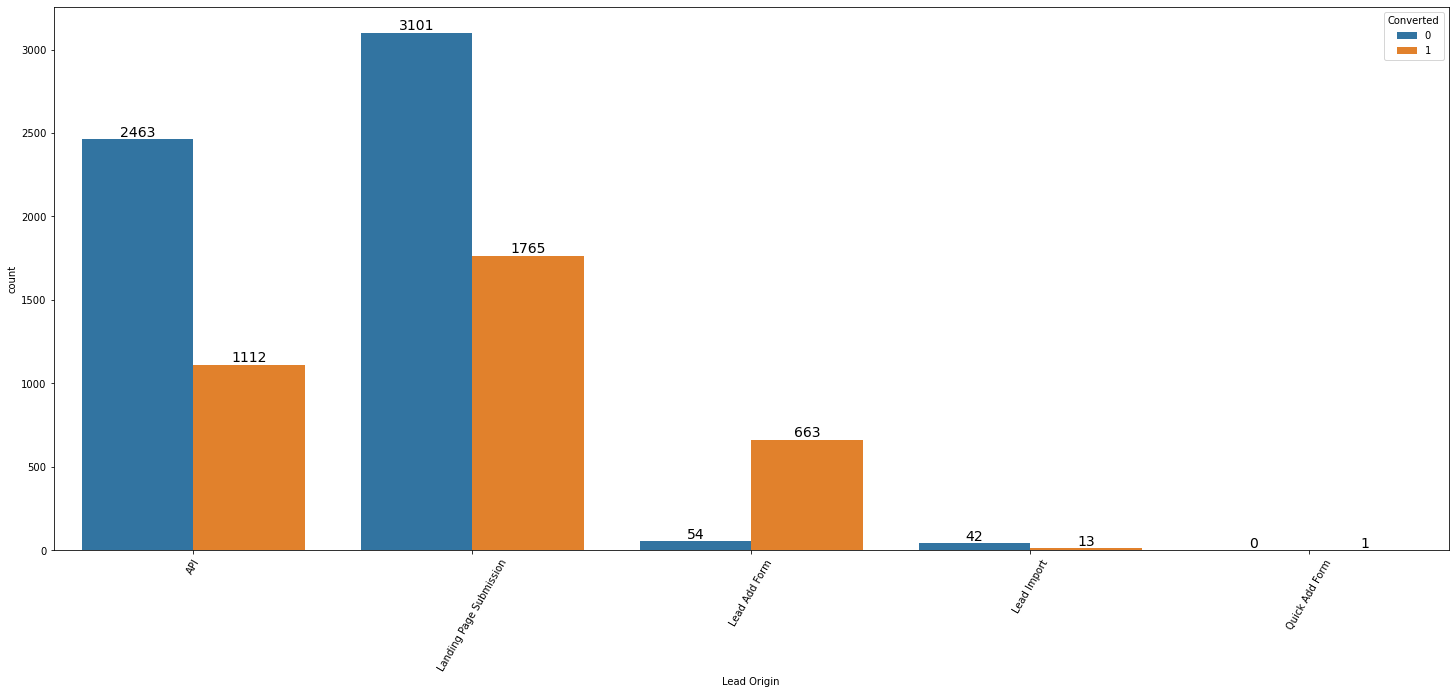

In [352]:
# Conversions based on lead Origin

plt.figure(figsize = (25,10))
ax = sns.countplot(x="Lead Origin", hue="Converted", data=leads)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

plot_annote()
plt.show()

- Most of our lead origins are from 'Landing Page Submission' and 'API'
- Most of conversions are from 'Landing Page Submission'
- And the conversion ratio is high among 'Lead Add Form'

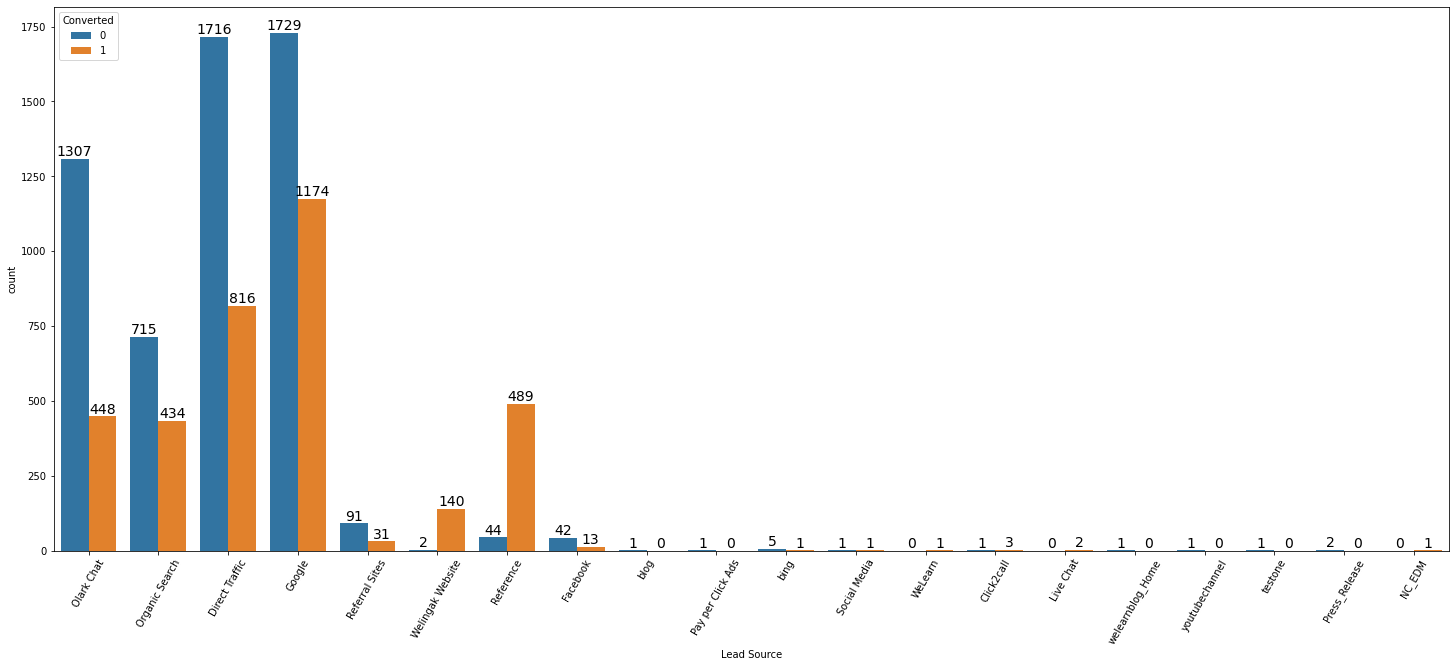

In [353]:
# Conversions based on lead Source

plt.figure(figsize = (25,10))
ax = sns.countplot(x="Lead Source", hue="Converted", data=leads)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

plot_annote()    
plt.show()

- From above most of the conversions happened from Google and Direct Traffic.
- Customers with reference have conversions more than non conversions. This is same from Welingak Website

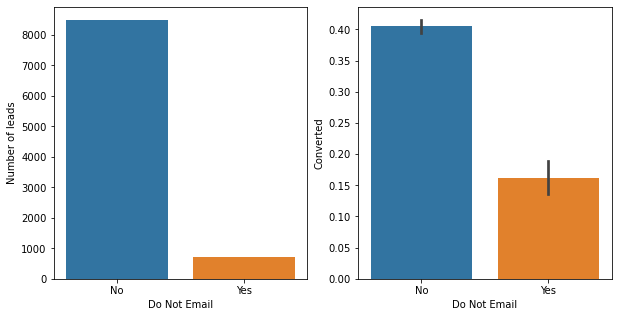

In [354]:
# Conversions based on "Do Not Email"

bar_sub_plot('Do Not Email', 'Do Not Email')

- Most of the customers did not opt out of email
- Obviuosly the most conversions happened from who did not opt out the email

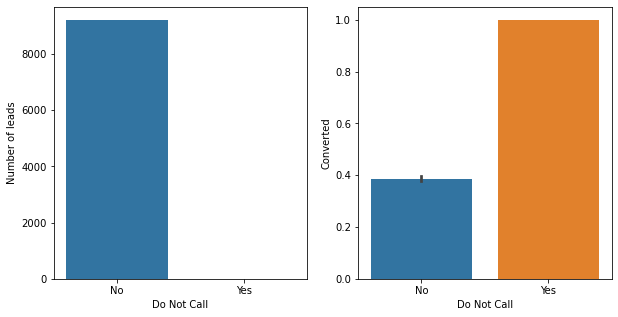

In [355]:
# Conversions based on "Do Not Call"

bar_sub_plot('Do Not Call', 'Do Not Call')

- Most of the customers did not opt out of calls
- Interestingly the most conversions happened from who did opt out of calls

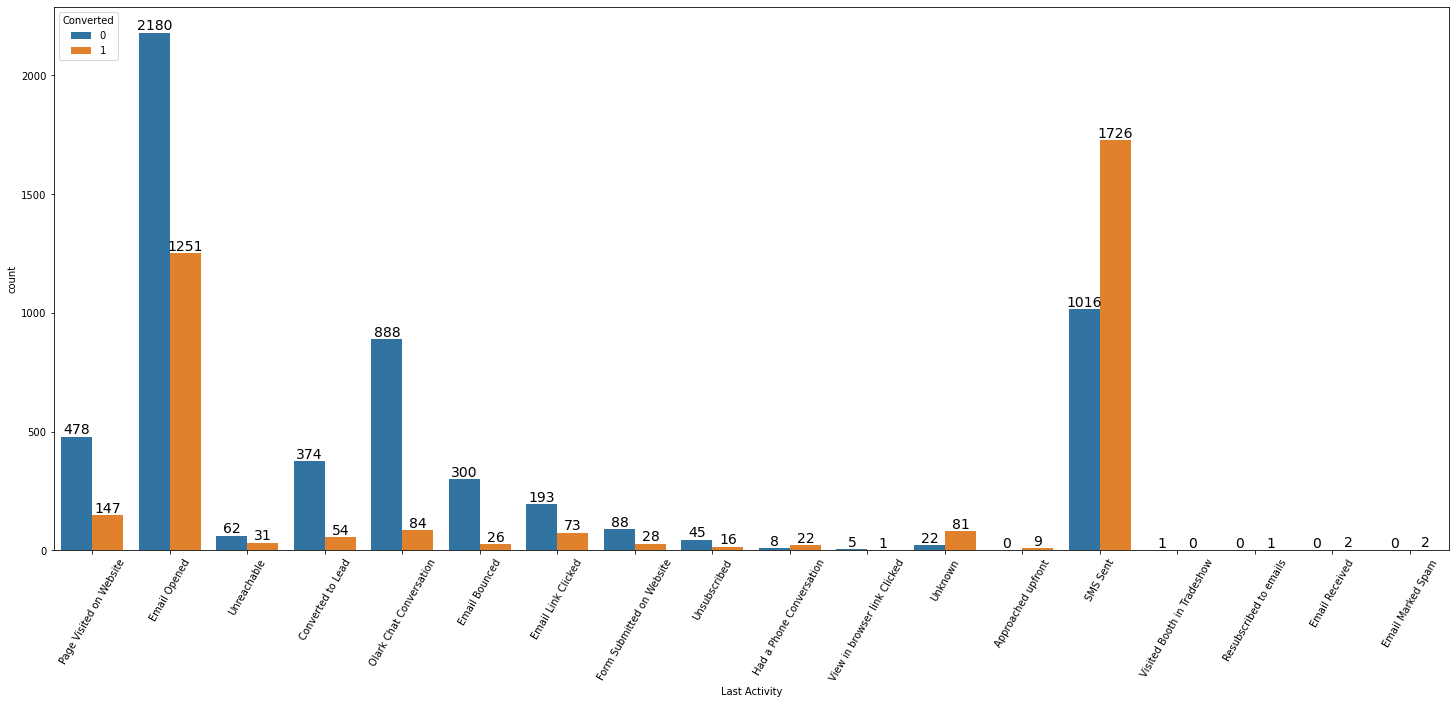

In [356]:
# Conversions based on Last Activity

plt.figure(figsize = (25,10))
ax = sns.countplot(x="Last Activity", hue="Converted", data=leads)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

plot_annote()   
plt.show()

- There are more convresion from whom last activity was "SMS Sent", followed by "Email Opened"
- Even the ratio of conversion is high with "SMS Sent".

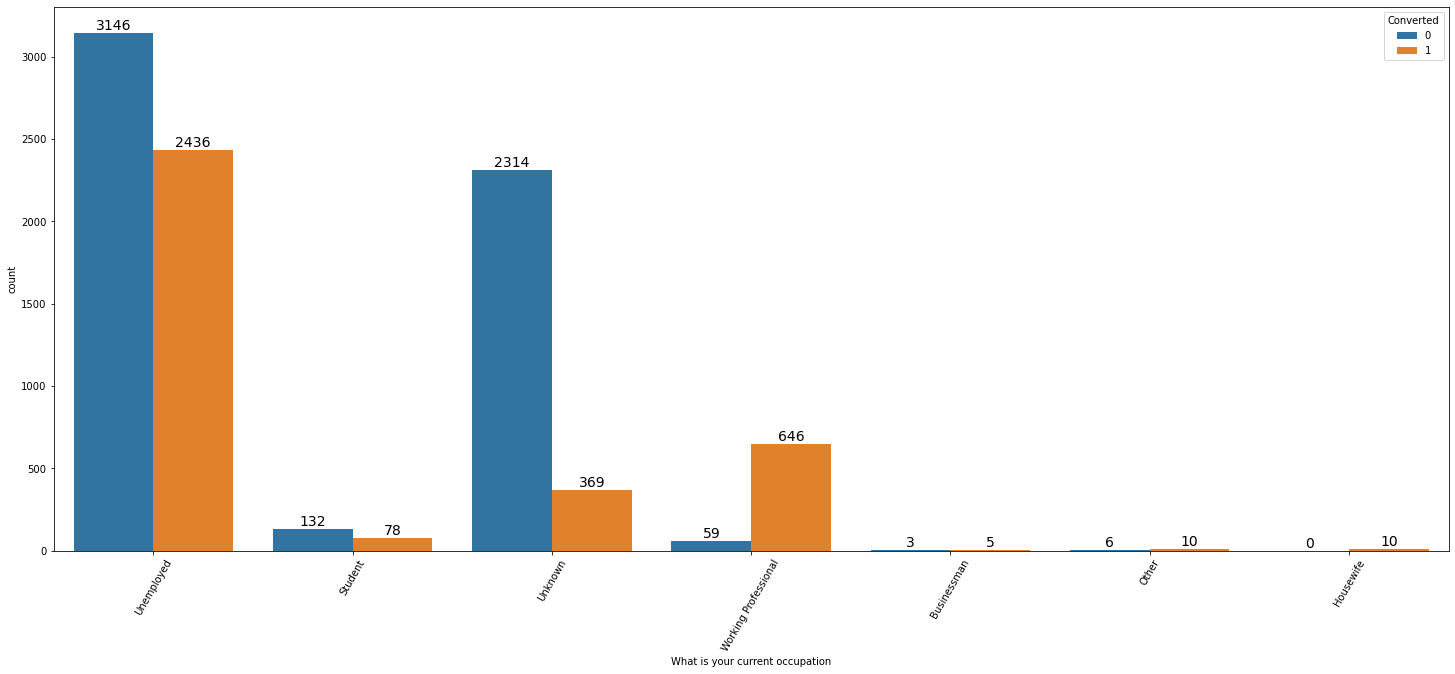

In [357]:
# Conversions based on occupation

plt.figure(figsize = (25,10))
ax = sns.countplot(x="What is your current occupation", hue="Converted", data=leads)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

plot_annote()
plt.show()

- There are more conversion from Unemployed.
- There is high conversion ratio from working professionals.

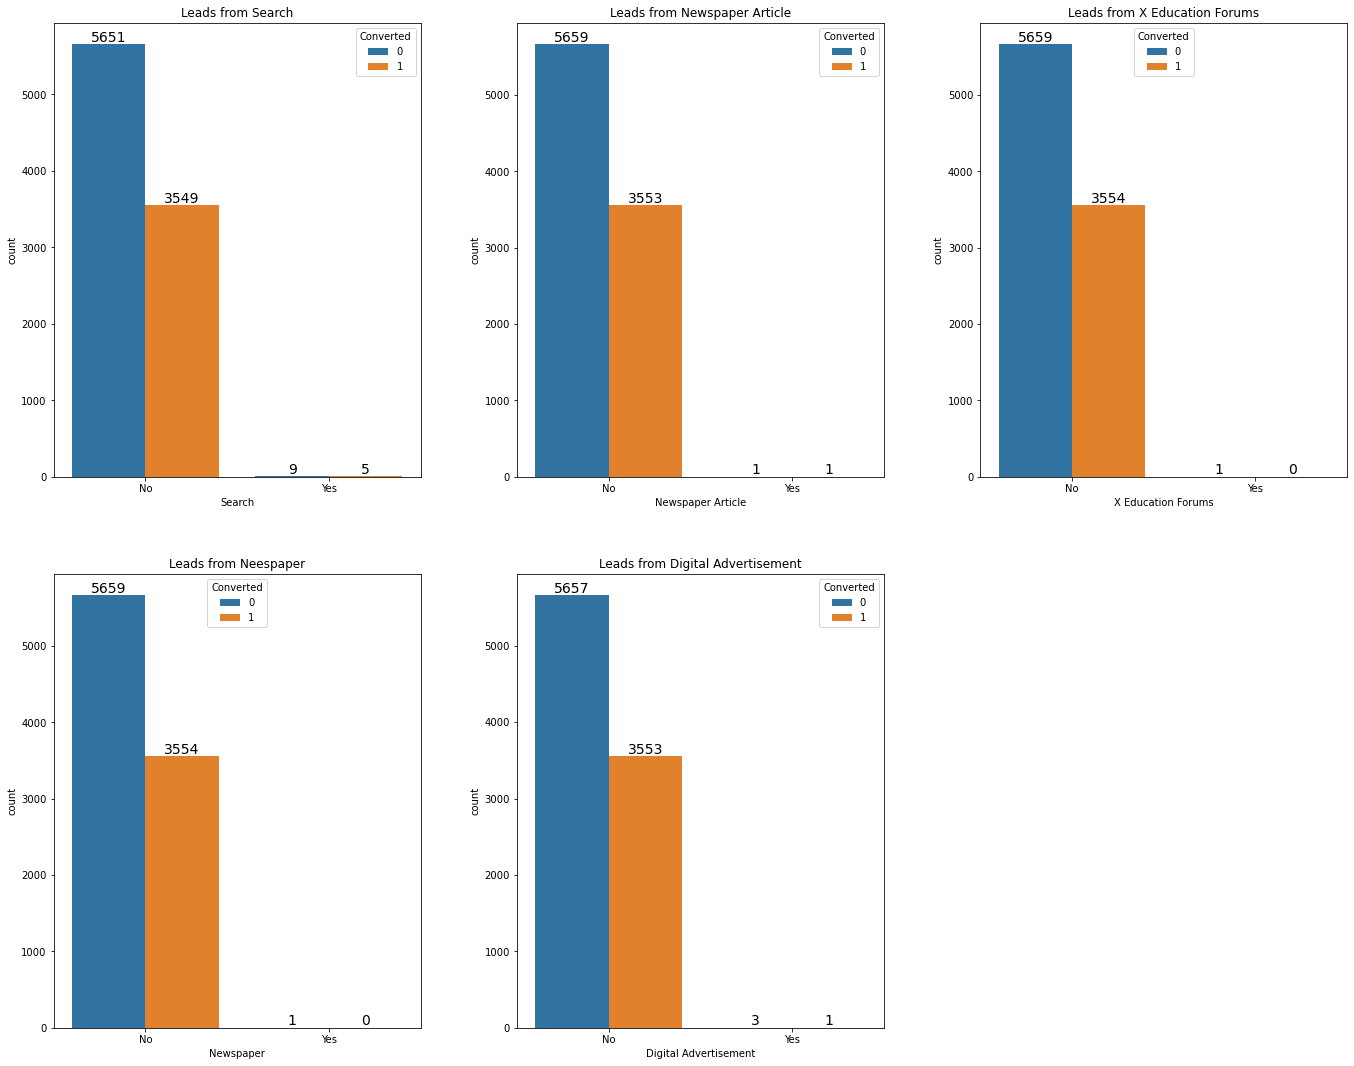

In [358]:
# Conversions based on different modes of Ad

plt.figure(figsize=(20, 16))
plt.subplot(2,3,1)
ax = sns.countplot(x="Search", hue="Converted", data=leads)
plt.title('Leads from Search')
plot_annote()

plt.subplot(2,3,2)
ax = sns.countplot(x="Newspaper Article", hue="Converted", data=leads)
plt.title('Leads from Newspaper Article')
plot_annote()

plt.subplot(2,3,3)
ax = sns.countplot(x="X Education Forums", hue="Converted", data=leads)
plt.title('Leads from X Education Forums')
plot_annote()

plt.subplot(2,3,4)
ax = sns.countplot(x="Newspaper", hue="Converted", data=leads)
plt.title('Leads from Neespaper')
plot_annote()

plt.subplot(2,3,5)
ax = sns.countplot(x="Digital Advertisement", hue="Converted", data=leads)
plt.title('Leads from Digital Advertisement')
plot_annote()

plt.tight_layout(pad=5)
plt.show()

- From the above Ad campaign charts almost all customers said No.
- We have got no conversions from "X Education Forums" and 'Newspaper".
- We have highest conversion ratio from "Newspaper Article".
- Also both Newspaper and X Education Forums has only one row with Yes and also that lead also did not convert, we can drop these two columns.

In [359]:
leads = leads.drop(['X Education Forums', 'Newspaper'], axis=1)

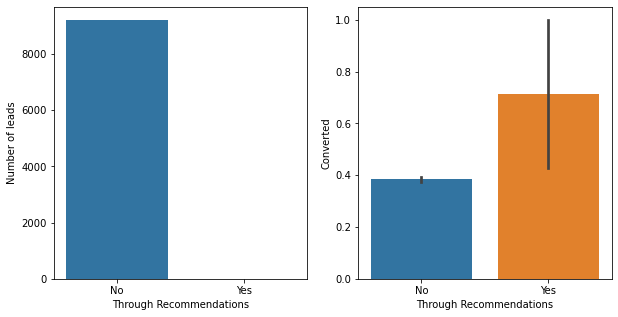

In [360]:
# Conversions based on "Through Recommendations"

bar_sub_plot('Through Recommendations', 'Through Recommendations')

- There are only few customer with recommendation and most of them have been converted.

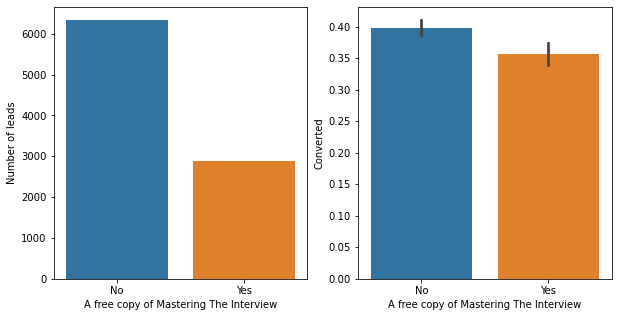

In [361]:
# Conversions based on "A free copy of Mastering The Interview"

bar_sub_plot('A free copy of Mastering The Interview', 'A free copy of Mastering The Interview')

- Mosted of the customer opted out for the free interview copy

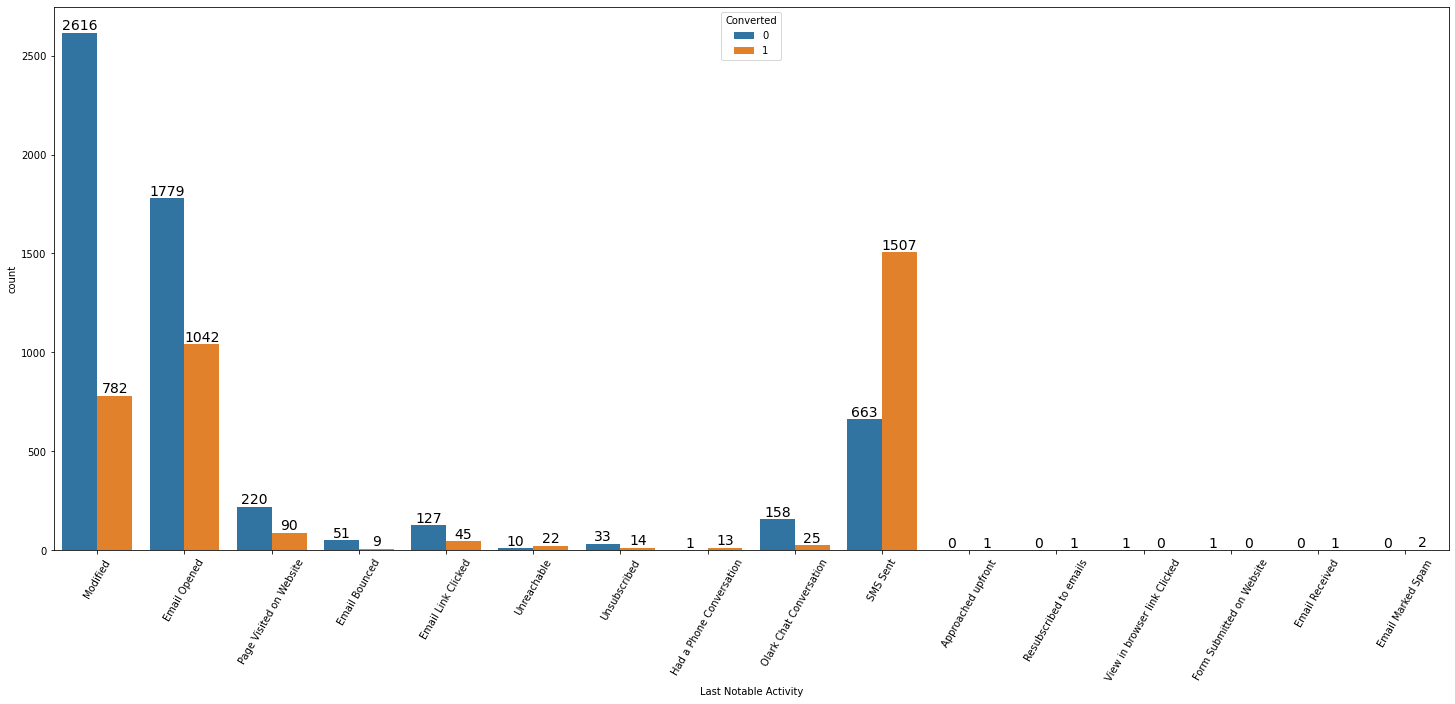

In [362]:
# Conversions based on "Last Notable Activity"

plt.figure(figsize = (25,10))
ax = sns.countplot(x="Last Notable Activity", hue="Converted", data=leads)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

plot_annote()   
plt.show()

- Same like the case of "Last Activity", here also more converion in SMS Sent.
- Also conversion rate is high for SMS Sent when compated to not converted.

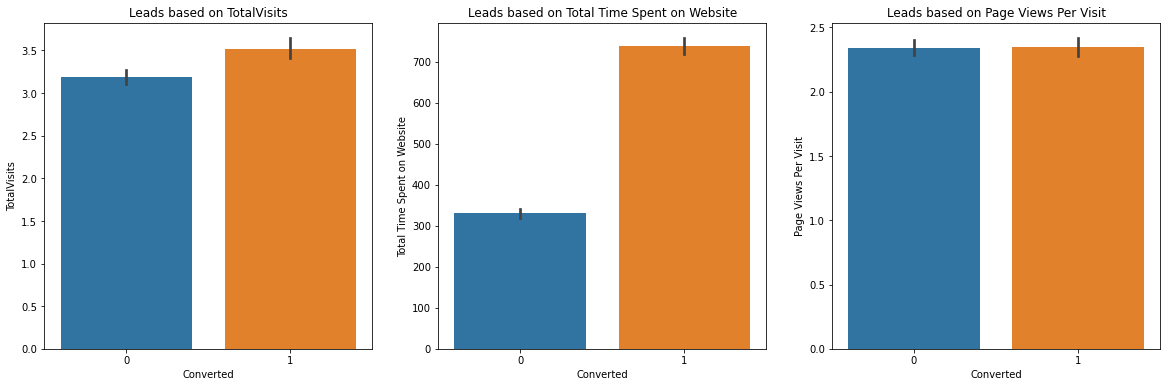

In [363]:
# Now lets see the conversion for numeric columns

plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
ax = sns.barplot(y="TotalVisits", x="Converted", data=leads)
plt.title('Leads based on TotalVisits')

plt.subplot(1,3,2)
ax = sns.barplot(y="Total Time Spent on Website", x="Converted", data=leads)
plt.title('Leads based on Total Time Spent on Website')

plt.subplot(1,3,3)
ax = sns.barplot(y="Page Views Per Visit", x="Converted", data=leads)
plt.title('Leads based on Page Views Per Visit')

plt.show()

- Conversion is high for those with high Total Time Spent on Website

# Step 5: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [364]:
# List of variables to map

varlist =  list(leads.columns[leads.nunique() <= 2])
varlist.remove('Converted')

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [365]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,0,Modified


#### For categorical variables with multiple levels, create dummy features.

In [366]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data=leads[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity']], 
                        prefix=['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity'], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [367]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [368]:
# We have created dummies for the below variables, so we can drop them

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity'], 1)

In [369]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9214 non-null   int64  
 1   Do Not Call                                           9214 non-null   int64  
 2   Converted                                             9214 non-null   int64  
 3   TotalVisits                                           9214 non-null   float64
 4   Total Time Spent on Website                           9214 non-null   int64  
 5   Page Views Per Visit                                  9214 non-null   float64
 6   Search                                                9214 non-null   int64  
 7   Newspaper Article                                     9214 non-null   int64  
 8   Digital Advertisement                                 9214

# Step 5: Test-Train Split

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [372]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [373]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6: Feature Scaling

In [374]:
from sklearn.preprocessing import StandardScaler

In [375]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2178,0,0,0.518566,-0.715514,1.304748,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2924,0,0,0.040004,0.057816,0.010728,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9108,0,0,0.210762,2.673012,0.814065,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7926,0,0,0.210762,-0.463774,-0.496059,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7870,0,0,0.826370,-0.461963,1.795431,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [376]:
### Checking the Conversion Rate
conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion

38.571738658563056

- We have almost 39% conversion rate

# Step 7: Looking at Correlations

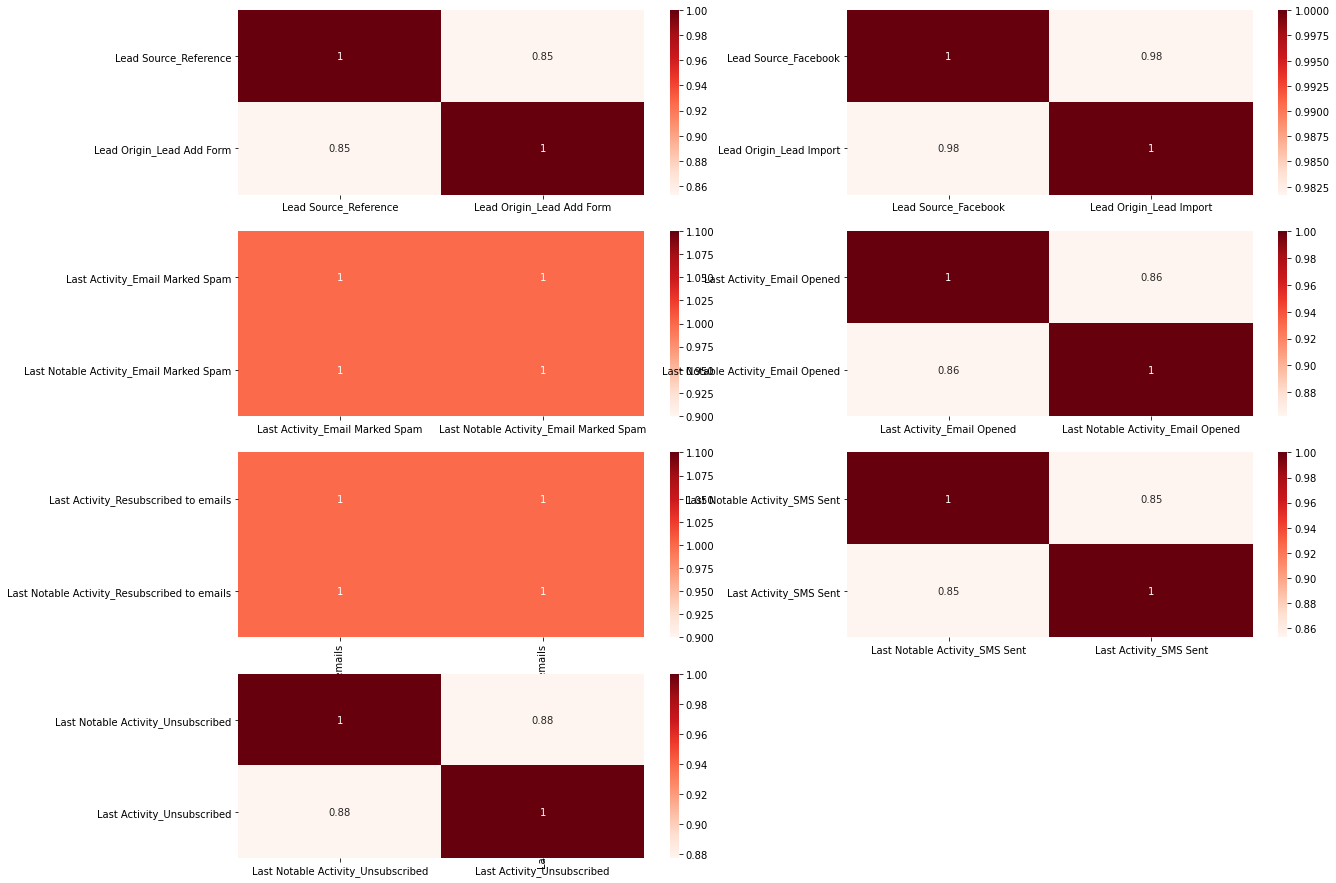

In [377]:
# Let's check high(more than 80%) correlation variables.

components = list()
visited = set()
for col in leads.columns:
    if col in visited:
        continue

    component = set([col, ])
    just_visited = [col, ]
    visited.add(col)
    while just_visited:
        c = just_visited.pop(0)
        for idx, val in corr[c].items():
            if val > 0.8 and idx not in visited:
                just_visited.append(idx)
                visited.add(idx)
                component.add(idx)
    components.append(component)

i = 1
plt.figure(figsize=(20,40))
for component in components:
    if len(component) > 1:
        plt.subplot(10,2,i)
        sns.heatmap(corr.loc[component, component], cmap="Reds", annot=True)
        i += 1

- As there are not many high correlated features, we will skip removing high correlation variables.

# Step 8: Model Building

#### Running Your First Training Model

In [378]:
import statsmodels.api as sm

In [379]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6382
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.8
Date:                Thu, 07 Jan 2021   Deviance:                       5063.6
Time:                        20:11:13   Pearson chi2:                 6.51e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1551   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                            -1.0437      0.205     -5.102      0.000      -1.445      -0.643
Do Not Call                                             23.8143   8.86e+04      0.000      1.000   -1.74e+05    1.74e+05
TotalVisits                                              0.2402      0.051      4.705      0.000       0.140       0.340
Total Time Spent on Website                              1.1122      0.041     26.818      0.000       1.031       1.193
Page Views Per Visit                                    -0.1818      0.055     -3.307      0.001      -0.290      -0.074
Search                                                  -0.4538      0.915     -0.496      0.620      -2.248       1.340
Newspaper Article                                        0.9608      1.812      0.530      0.596      -2.591       4.513
Digital Advertisement                                   -0.0341      1.812     -0.019      0.985      -3.585       3.517
Through Recommendations                                  0.1160      1.433      0.081      0.935      -2.693       2.925
A free copy of Mastering The Interview                  -0.0117      0.109     -0.107      0.915      -0.225       0.202
Lead Origin_Landing Page Submission                     -0.1421      0.110     -1.288      0.198      -0.358       0.074
Lead Origin_Lead Add Form                                2.9244      0.579      5.055      0.000       1.790       4.058
Lead Origin_Lead Import                                 25.2303   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Quick Add Form                             4.67e-09   2.06e-05      0.000      1.000   -4.03e-05    4.03e-05
Lead Source_Direct Traffic                               1.3425      1.525      0.880      0.379      -1.647       4.332
Lead Source_Facebook                                   -23.4037   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       1.6035      1.521      1.054      0.292      -1.377       4.584
Lead Source_Live Chat                                   23.5918   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_NC_EDM                                      26.9746   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Olark Chat                                   2.6751      1.529      1.750      0.080      -0.322       5.672
Lead Source_Organic Search                               1.4625      1.526      0.958      0.338      -1.529       4.454
Lead Source_Pay per Click Ads                          -21

# Step 9: Feature Selection Using RFE

In [380]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [381]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [382]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
        True,  True, False, False, False,  True, False, False,  True,
        True,  True, False,  True, False,  True, False, False])

In [383]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Search', False, 30),
 ('Newspaper Article', False, 15),
 ('Digital Advertisement', False, 44),
 ('Through Recommendations', False, 40),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 50),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Pay per Click Ads', False, 29),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source

In [384]:
col = X_train.columns[rfe.support_]

In [385]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Form Submitted 

##### Assessing the model with StatsModels

In [386]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.6
Date:                Thu, 07 Jan 2021   Deviance:                       5149.3
Time:                        20:11:30   Pearson chi2:                 6.56e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2202      0.677      0.325      0.745      -1.108       1.548
Do Not Email                                            -1.0823      0.170     -6.369      0.000      -1.415      -0.749
Total Time Spent on Website                              1.1298      0.041     27.550      0.000       1.049       1.210
Lead Origin_Lead Add Form                                3.0507      0.523      5.836      0.000       2.026       4.075
Lead Source_Olark Chat                                   1.2442      0.104     11.989      0.000       1.041       1.448
Lead Source_Reference                                    0.6369      0.556      1.146      0.252      -0.453       1.727
Lead Source_Welingak Website                             3.2773      1.137      2.882      0.004       1.048       5.506
Last Activity_Email Opened                               1.1104      0.153      7.256      0.000       0.810       1.410
Last Activity_SMS Sent                                   1.4832      0.114     13.046      0.000       1.260       1.706
Last Activity_Unknown                                   -1.0092      0.473     -2.132      0.033      -1.937      -0.081
What is your current occupation_Housewife               22.5308    2.3e+04      0.001      0.999    -4.5e+04    4.51e+04
What is your current occupation_Student                 -1.1937      0.703     -1.698      0.089      -2.571       0.184
What is your current occupation_Unemployed              -1.3106      0.669     -1.959      0.050      -2.622       0.001
What is your current occupation_Unknown                 -2.5010      0.673     -3.718      0.000      -3.819      -1.183
What is your current occupation_Working Professional     1.0927      0.691      1.582      0.114      -0.261       2.446
Last Notable Activity_Email Opened                      -0.9367      0.178     -5.252      0.000      -1.286      -0.587
Last Notable Activity_Had a Phone Conversation          24.0549   1.96e+04      0.001      0.999   -3.84e+04    3.85e+04
Last Notable Activity_Modified                          -1.0629      0.113     -9.424      0.000      -1.284      -0.842
Last Notable Activity_Olark Chat Conversation           -1.4673      0.370     -3.966      0.000      -2.192      -0.742
Last Notable Activity_Resubscribed to emails            25.6034   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_Unreachable                        2.1947      0.561      3.914      0.000       1.096       3.294
========================================================================================================================
"""

In [387]:
# What is your current occupation_Housewife has high p value. So lets drop it.

col = col.drop('What is your current occupation_Housewife',1)

##### Building model 3

In [388]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.8
Date:                Thu, 07 Jan 2021   Deviance:                       5153.7
Time:                        20:11:30   Pearson chi2:                 6.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8986      0.614      1.463      0.144      -0.306       2.103
Do Not Email                                            -1.0863      0.170     -6.387      0.000      -1.420      -0.753
Total Time Spent on Website                              1.1288      0.041     27.536      0.000       1.048       1.209
Lead Origin_Lead Add Form                                3.0507      0.523      5.836      0.000       2.026       4.075
Lead Source_Olark Chat                                   1.2419      0.104     11.967      0.000       1.038       1.445
Lead Source_Reference                                    0.6382      0.556      1.148      0.251      -0.451       1.728
Lead Source_Welingak Website                             3.2747      1.137      2.880      0.004       1.046       5.504
Last Activity_Email Opened                               1.1132      0.153      7.284      0.000       0.814       1.413
Last Activity_SMS Sent                                   1.4825      0.114     13.044      0.000       1.260       1.705
Last Activity_Unknown                                   -1.0002      0.472     -2.119      0.034      -1.926      -0.075
What is your current occupation_Student                 -1.8708      0.643     -2.910      0.004      -3.131      -0.611
What is your current occupation_Unemployed              -1.9877      0.606     -3.280      0.001      -3.176      -0.800
What is your current occupation_Unknown                 -3.1777      0.610     -5.209      0.000      -4.373      -1.982
What is your current occupation_Working Professional     0.4153      0.629      0.660      0.509      -0.818       1.649
Last Notable Activity_Email Opened                      -0.9411      0.178     -5.282      0.000      -1.290      -0.592
Last Notable Activity_Had a Phone Conversation          23.0537   1.19e+04      0.002      0.998   -2.33e+04    2.34e+04
Last Notable Activity_Modified                          -1.0635      0.113     -9.432      0.000      -1.285      -0.843
Last Notable Activity_Olark Chat Conversation           -1.4669      0.370     -3.965      0.000      -2.192      -0.742
Last Notable Activity_Resubscribed to emails            24.6031   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_Unreachable                        2.1917      0.561      3.906      0.000       1.092       3.291
========================================================================================================================
"""

In [389]:
# Last Notable Activity_Had a Phone Conversation has high p value. So lets drop it.

col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

##### Building model 4

In [390]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.0
Date:                Thu, 07 Jan 2021   Deviance:                       5174.0
Time:                        20:11:30   Pearson chi2:                 6.57e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9628      0.614      1.569      0.117      -0.240       2.166
Do Not Email                                            -1.1111      0.170     -6.544      0.000      -1.444      -0.778
Total Time Spent on Website                              1.1266      0.041     27.556      0.000       1.046       1.207
Lead Origin_Lead Add Form                                3.0426      0.522      5.829      0.000       2.020       4.066
Lead Source_Olark Chat                                   1.2292      0.104     11.872      0.000       1.026       1.432
Lead Source_Reference                                    0.6366      0.555      1.147      0.252      -0.452       1.725
Lead Source_Welingak Website                             3.2747      1.137      2.881      0.004       1.047       5.503
Last Activity_Email Opened                               1.0916      0.152      7.159      0.000       0.793       1.390
Last Activity_SMS Sent                                   1.4241      0.112     12.683      0.000       1.204       1.644
Last Activity_Unknown                                   -1.0166      0.472     -2.156      0.031      -1.941      -0.092
What is your current occupation_Student                 -1.8694      0.643     -2.909      0.004      -3.129      -0.610
What is your current occupation_Unemployed              -1.9785      0.606     -3.266      0.001      -3.166      -0.791
What is your current occupation_Unknown                 -3.1743      0.610     -5.207      0.000      -4.369      -1.979
What is your current occupation_Working Professional     0.4127      0.629      0.656      0.512      -0.820       1.646
Last Notable Activity_Email Opened                      -0.9881      0.178     -5.563      0.000      -1.336      -0.640
Last Notable Activity_Modified                          -1.1096      0.112     -9.908      0.000      -1.329      -0.890
Last Notable Activity_Olark Chat Conversation           -1.5284      0.369     -4.138      0.000      -2.252      -0.804
Last Notable Activity_Resubscribed to emails            22.5463   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Unreachable                        2.1212      0.561      3.782      0.000       1.022       3.220
========================================================================================================================
"""

In [391]:
# Last Notable Activity_Resubscribed to emails has high p value. So lets drop it.

col = col.drop('Last Notable Activity_Resubscribed to emails',1)

##### Building model 5

In [392]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.1
Date:                Thu, 07 Jan 2021   Deviance:                       5178.2
Time:                        20:11:31   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9725      0.614      1.584      0.113      -0.230       2.175
Do Not Email                                            -1.1142      0.170     -6.564      0.000      -1.447      -0.782
Total Time Spent on Website                              1.1263      0.041     27.554      0.000       1.046       1.206
Lead Origin_Lead Add Form                                3.0435      0.522      5.832      0.000       2.021       4.066
Lead Source_Olark Chat                                   1.2335      0.103     11.923      0.000       1.031       1.436
Lead Source_Reference                                    0.6367      0.555      1.147      0.251      -0.451       1.725
Lead Source_Welingak Website                             3.2753      1.137      2.881      0.004       1.047       5.503
Last Activity_Email Opened                               1.0885      0.152      7.143      0.000       0.790       1.387
Last Activity_SMS Sent                                   1.4153      0.112     12.622      0.000       1.195       1.635
Last Activity_Unknown                                   -1.0182      0.472     -2.159      0.031      -1.943      -0.094
What is your current occupation_Student                 -1.8707      0.643     -2.911      0.004      -3.130      -0.611
What is your current occupation_Unemployed              -1.9793      0.606     -3.268      0.001      -3.166      -0.792
What is your current occupation_Unknown                 -3.1699      0.610     -5.200      0.000      -4.365      -1.975
What is your current occupation_Working Professional     0.4118      0.629      0.655      0.513      -0.821       1.645
Last Notable Activity_Email Opened                      -0.9956      0.178     -5.608      0.000      -1.344      -0.648
Last Notable Activity_Modified                          -1.1175      0.112     -9.988      0.000      -1.337      -0.898
Last Notable Activity_Olark Chat Conversation           -1.5412      0.369     -4.175      0.000      -2.265      -0.818
Last Notable Activity_Unreachable                        2.1102      0.561      3.764      0.000       1.011       3.209
========================================================================================================================
"""

In [393]:
# What is your current occupation_Working Professional has high p value. So lets drop it.

col = col.drop('What is your current occupation_Working Professional',1)

##### Building model 6

In [394]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.3
Date:                Thu, 07 Jan 2021   Deviance:                       5178.6
Time:                        20:11:31   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.3554      0.198      6.848      0.000       0.967       1.743
Do Not Email                                     -1.1146      0.170     -6.566      0.000      -1.447      -0.782
Total Time Spent on Website                       1.1261      0.041     27.551      0.000       1.046       1.206
Lead Origin_Lead Add Form                         3.0435      0.522      5.832      0.000       2.021       4.066
Lead Source_Olark Chat                            1.2338      0.103     11.926      0.000       1.031       1.437
Lead Source_Reference                             0.6373      0.555      1.148      0.251      -0.451       1.725
Lead Source_Welingak Website                      3.2755      1.137      2.882      0.004       1.048       5.503
Last Activity_Email Opened                        1.0892      0.152      7.147      0.000       0.790       1.388
Last Activity_SMS Sent                            1.4158      0.112     12.630      0.000       1.196       1.635
Last Activity_Unknown                            -1.0191      0.472     -2.160      0.031      -1.944      -0.094
What is your current occupation_Student          -2.2529      0.277     -8.120      0.000      -2.797      -1.709
What is your current occupation_Unemployed       -2.3617      0.174    -13.536      0.000      -2.704      -2.020
What is your current occupation_Unknown          -3.5523      0.188    -18.910      0.000      -3.920      -3.184
Last Notable Activity_Email Opened               -0.9976      0.177     -5.621      0.000      -1.345      -0.650
Last Notable Activity_Modified                   -1.1186      0.112    -10.000      0.000      -1.338      -0.899
Last Notable Activity_Olark Chat Conversation    -1.5411      0.369     -4.177      0.000      -2.264      -0.818
Last Notable Activity_Unreachable                 2.1092      0.561      3.761      0.000       1.010       3.208
=================================================================================================================
"""

In [395]:
# Lead Source_Reference has high p value. So lets drop it.

col = col.drop('Lead Source_Reference',1)

##### Building model 7

In [396]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.9
Date:                Thu, 07 Jan 2021   Deviance:                       5179.8
Time:                        20:11:31   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.3600      0.198      6.875      0.000       0.972       1.748
Do Not Email                                     -1.1367      0.170     -6.703      0.000      -1.469      -0.804
Total Time Spent on Website                       1.1259      0.041     27.543      0.000       1.046       1.206
Lead Origin_Lead Add Form                         3.6051      0.206     17.515      0.000       3.202       4.009
Lead Source_Olark Chat                            1.2328      0.103     11.915      0.000       1.030       1.436
Lead Source_Welingak Website                      2.7094      1.028      2.636      0.008       0.695       4.724
Last Activity_Email Opened                        1.0897      0.152      7.156      0.000       0.791       1.388
Last Activity_SMS Sent                            1.4154      0.112     12.624      0.000       1.196       1.635
Last Activity_Unknown                            -0.9844      0.466     -2.110      0.035      -1.899      -0.070
What is your current occupation_Student          -2.2536      0.277     -8.130      0.000      -2.797      -1.710
What is your current occupation_Unemployed       -2.3660      0.174    -13.571      0.000      -2.708      -2.024
What is your current occupation_Unknown          -3.5566      0.188    -18.943      0.000      -3.925      -3.189
Last Notable Activity_Email Opened               -0.9971      0.177     -5.620      0.000      -1.345      -0.649
Last Notable Activity_Modified                   -1.1174      0.112     -9.989      0.000      -1.337      -0.898
Last Notable Activity_Olark Chat Conversation    -1.5397      0.369     -4.174      0.000      -2.263      -0.817
Last Notable Activity_Unreachable                 2.1101      0.561      3.763      0.000       1.011       3.209
=================================================================================================================
"""

In [397]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2178    0.062724
2924    0.637017
9108    0.968292
7926    0.021120
7870    0.192551
7615    0.166744
2718    0.224820
500     0.185273
8328    0.029289
505     0.836706
dtype: float64

In [398]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06272428, 0.63701735, 0.96829166, 0.02112032, 0.1925507 ,
       0.16674363, 0.22482012, 0.18527316, 0.02928899, 0.83670612])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [399]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['leadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,leadID
0,0,0.062724,2178
1,1,0.637017,2924
2,0,0.968292,9108
3,0,0.021120,7926
4,0,0.192551,7870


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [400]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,leadID,predicted
0,0,0.062724,2178,0
1,1,0.637017,2924,1
2,0,0.968292,9108,1
3,0,0.021120,7926,0
4,0,0.192551,7870,0


In [401]:
from sklearn import metrics

In [402]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3472  447]
 [ 722 1808]]


In [404]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8187315862924485


#### Checking VIFs

In [405]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [406]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Email Opened,7.77
5,Last Activity_Email Opened,6.99
9,What is your current occupation_Unemployed,4.25
12,Last Notable Activity_Modified,2.93
10,What is your current occupation_Unknown,2.92
6,Last Activity_SMS Sent,2.13
2,Lead Origin_Lead Add Form,1.57
3,Lead Source_Olark Chat,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Welingak Website,1.25


- There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.
- The variable 'Last Notable Activity_Email Opened' has the highest VIF.
- So let's start by dropping that.

In [407]:
col = col.drop('Last Notable Activity_Email Opened', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Last Activity_Unknown',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Unknown',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

##### Building model 8

In [408]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.4
Date:                Thu, 07 Jan 2021   Deviance:                       5210.8
Time:                        20:12:19   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.1016      0.193      5.715      0.000       0.724       1.479
Do Not Email                                     -1.0845      0.169     -6.428      0.000      -1.415      -0.754
Total Time Spent on Website                       1.1250      0.041     27.616      0.000       1.045       1.205
Lead Origin_Lead Add Form                         3.6269      0.206     17.577      0.000       3.223       4.031
Lead Source_Olark Chat                            1.2438      0.103     12.050      0.000       1.042       1.446
Lead Source_Welingak Website                      2.7025      1.028      2.629      0.009       0.688       4.717
Last Activity_Email Opened                        0.4627      0.107      4.320      0.000       0.253       0.673
Last Activity_SMS Sent                            1.6018      0.108     14.890      0.000       1.391       1.813
Last Activity_Unknown                            -1.1180      0.466     -2.397      0.017      -2.032      -0.204
What is your current occupation_Student          -2.2943      0.276     -8.306      0.000      -2.836      -1.753
What is your current occupation_Unemployed       -2.3713      0.174    -13.613      0.000      -2.713      -2.030
What is your current occupation_Unknown          -3.5878      0.188    -19.131      0.000      -3.955      -3.220
Last Notable Activity_Modified                   -0.7372      0.089     -8.312      0.000      -0.911      -0.563
Last Notable Activity_Olark Chat Conversation    -1.2721      0.366     -3.476      0.001      -1.989      -0.555
Last Notable Activity_Unreachable                 2.3808      0.560      4.253      0.000       1.284       3.478
=================================================================================================================
"""

In [409]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [410]:
y_train_pred[:10]

array([0.08116928, 0.63810427, 0.96575453, 0.02308629, 0.20971648,
       0.18214817, 0.14829264, 0.23551103, 0.0290037 , 0.85138985])

In [411]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [412]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,leadID,predicted
0,0,0.081169,2178,0
1,1,0.638104,2924,1
2,0,0.965755,9108,1
3,0,0.023086,7926,0
4,0,0.209716,7870,0


In [413]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8199720886959219


- So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [414]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.74
10,What is your current occupation_Unknown,2.58
5,Last Activity_Email Opened,2.44
6,Last Activity_SMS Sent,2.05
11,Last Notable Activity_Modified,2.05
2,Lead Origin_Lead Add Form,1.57
3,Lead Source_Olark Chat,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Welingak Website,1.24
7,Last Activity_Unknown,1.19


- All variables have a good value of VIF.
- So we need not drop any more variables and we can proceed with making predictions using this model only

In [416]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3487,  432],
       [ 729, 1801]], dtype=int64)

In [417]:
# Actual/Predicted     not_churn    churn
        # not_churn        3487      432
        # churn            729       1801  

In [418]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8199720886959219

## Metrics beyond simply accuracy

In [419]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [420]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7118577075098814

In [421]:
# Let us calculate specificity
TN / float(TN+FP)

0.8897677979076295

In [422]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1102322020923705


In [423]:
# positive predictive value 
print (TP / float(TP+FP))

0.80653828929691


In [424]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8270872865275142


# Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [425]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [427]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

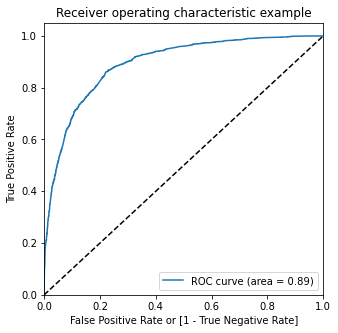

In [428]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [429]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,leadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.081169,2178,0,1,0,0,0,0,0,0,0,0,0
1,1,0.638104,2924,1,1,1,1,1,1,1,1,0,0,0
2,0,0.965755,9108,1,1,1,1,1,1,1,1,1,1,1
3,0,0.023086,7926,0,1,0,0,0,0,0,0,0,0,0
4,0,0.209716,7870,0,1,1,1,0,0,0,0,0,0,0


In [431]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.392309  1.000000  0.000000
0.1   0.1  0.642425  0.972332  0.429446
0.2   0.2  0.761979  0.923715  0.657566
0.3   0.3  0.803070  0.873518  0.757591
0.4   0.4  0.814080  0.780632  0.835672
0.5   0.5  0.819972  0.711858  0.889768
0.6   0.6  0.808653  0.637549  0.919112
0.7   0.7  0.785238  0.536759  0.945649
0.8   0.8  0.760273  0.445455  0.963511
0.9   0.9  0.712514  0.288933  0.985966


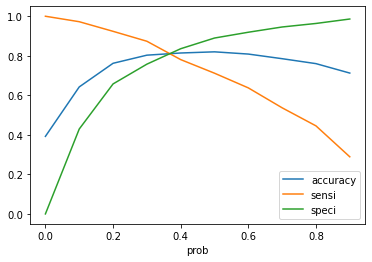

In [432]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [481]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,leadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.081169,2178,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.638104,2924,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.965755,9108,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.023086,7926,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.209716,7870,0,1,1,1,0,0,0,0,0,0,0,0


In [435]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8140797022794232

In [436]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3275,  644],
       [ 555, 1975]], dtype=int64)

In [437]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [438]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7806324110671937

In [439]:
# Let us calculate specificity
TN / float(TN+FP)

0.8356723653993365

In [440]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16432763460066344


In [441]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7541046200840015


In [442]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8550913838120104


## Precision and Recall

In [443]:
#Looking at the confusion matrix again

In [444]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3487,  432],
       [ 729, 1801]], dtype=int64)

##### Precision
TP / TP + FP

In [445]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.80653828929691

##### Recall
TP / TP + FN

In [446]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7118577075098814

Using sklearn utilities for the same

In [447]:
from sklearn.metrics import precision_score, recall_score

In [450]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.80653828929691

In [451]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7118577075098814

### Precision and recall tradeoff

In [452]:
from sklearn.metrics import precision_recall_curve

In [454]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6444    0
 6445    1
 6446    1
 6447    0
 6448    1
 Name: Converted, Length: 6449, dtype: int64,
 0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6444    0
 6445    1
 6446    1
 6447    0
 6448    0
 Name: predicted, Length: 6449, dtype: int64)

In [455]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

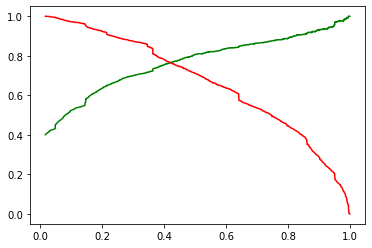

In [456]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11: Making predictions on the test set

In [457]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [458]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_SMS Sent,Last Activity_Unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
2729,0,1.425180,0,0,0,0,1,0,1,0,0,0,0,0
5463,0,1.709519,0,0,0,1,0,0,0,1,0,0,0,0
6476,0,-0.760791,0,0,0,1,0,0,0,1,0,0,0,0
4135,0,-0.407631,0,0,0,1,0,0,0,0,0,0,0,0
5408,0,-0.885755,0,1,0,0,1,0,0,1,0,0,0,0


In [459]:
X_test_sm = sm.add_constant(X_test)

- Making predictions on the test set

In [460]:
y_test_pred = res.predict(X_test_sm)

In [461]:
y_test_pred[:10]

2729    0.882101
5463    0.753308
6476    0.159383
4135    0.751339
5408    0.640947
2681    0.995198
2271    0.926111
2659    0.985150
3186    0.714797
8213    0.874714
dtype: float64

In [462]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [463]:
# Let's see the head
y_pred_1.head()

,0
2729,0.882101
5463,0.753308
6476,0.159383
4135,0.751339
5408,0.640947


In [464]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [465]:
# Putting CustID to index
y_test_df['leadID'] = y_test_df.index

In [466]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [467]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [468]:
y_pred_final.head()

,Converted,leadID,0
0,1,2729,0.882101
1,0,5463,0.753308
2,0,6476,0.159383
3,1,4135,0.751339
4,1,5408,0.640947


In [469]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [471]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['leadID','Converted','Converted_Prob'], axis=1)

In [472]:
# Let's see the head of y_pred_final
y_pred_final.head()

,leadID,Converted,Converted_Prob
0,2729,1,0.882101
1,5463,0,0.753308
2,6476,0,0.159383
3,4135,1,0.751339
4,5408,1,0.640947


In [474]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [475]:
y_pred_final.head()

,leadID,Converted,Converted_Prob,final_predicted
0,2729,1,0.882101,1
1,5463,0,0.753308,1
2,6476,0,0.159383,0
3,4135,1,0.751339,1
4,5408,1,0.640947,1


In [476]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8090415913200724

In [477]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1454,  287],
       [ 241,  783]], dtype=int64)

In [478]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [479]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7646484375

In [480]:
# Let us calculate specificity
TN / float(TN+FP)

0.8351522113727743